# K-nearest neighbours

Nous allons vous montrer un example qui fonctionne, puis vous donner une base de données sur laquelle vous pourrez vous exercer.

#### Here is a working example

Automatically created module for IPython interactive environment


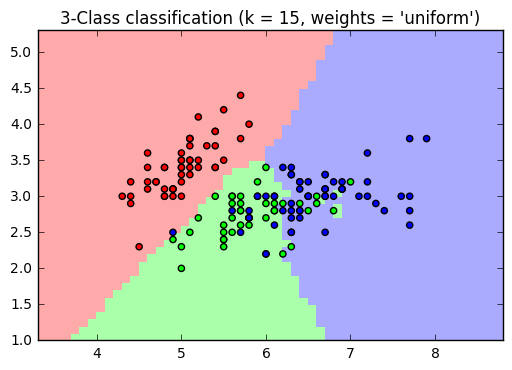

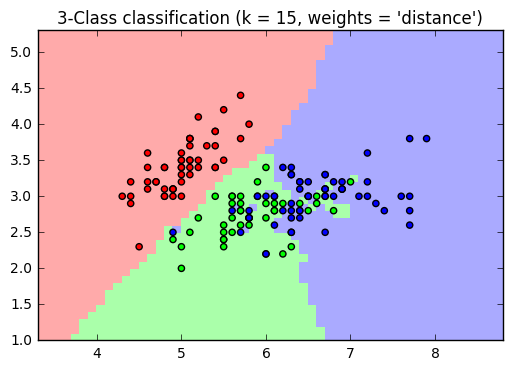

In [3]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .1  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

#### A vous !

Prenez le code précédent, et essayez de l'adapter à ces données. 

En l'appliquant à un nouveau problème, vous pouvez obtenir des résultats très satisfaisants.

Les données sont des fausses données qui représentent la longueur de pas moyenne d'hommes et de femmes, ainsi que la fréquence moyenne de ces pas.

Sur une première base de données, pour chaque donnée vous savez s'il s'agit d'un homme ou d'une femme. Grâce à ce jeu de données, vous pouvez construire un classifieur selon la méthode présentée au-dessus.

L'objectif est de prédire le genre sur un jeu de données où cette information n'est pas présente; pour chauqe individu, seules la longueur et la fréquence sont présentes. 

Ces sets de données sont dans des csv :

- la première base de données est dans : **gender_classification.csv**
- la seconde base de données sans le genre de la personne est dans : **gender_classification_test_data.csv**

Enfin, pour vérifier si votre algorithme est bon, vous pouvez comparer votre prédiction au vrai résultat qui se trouve dans le fichier : **gender_classification_test_outcome.csv**

Bonus : créer une fonction qui vous retourne le taux de bonne classification.

##### Vos données visuellement

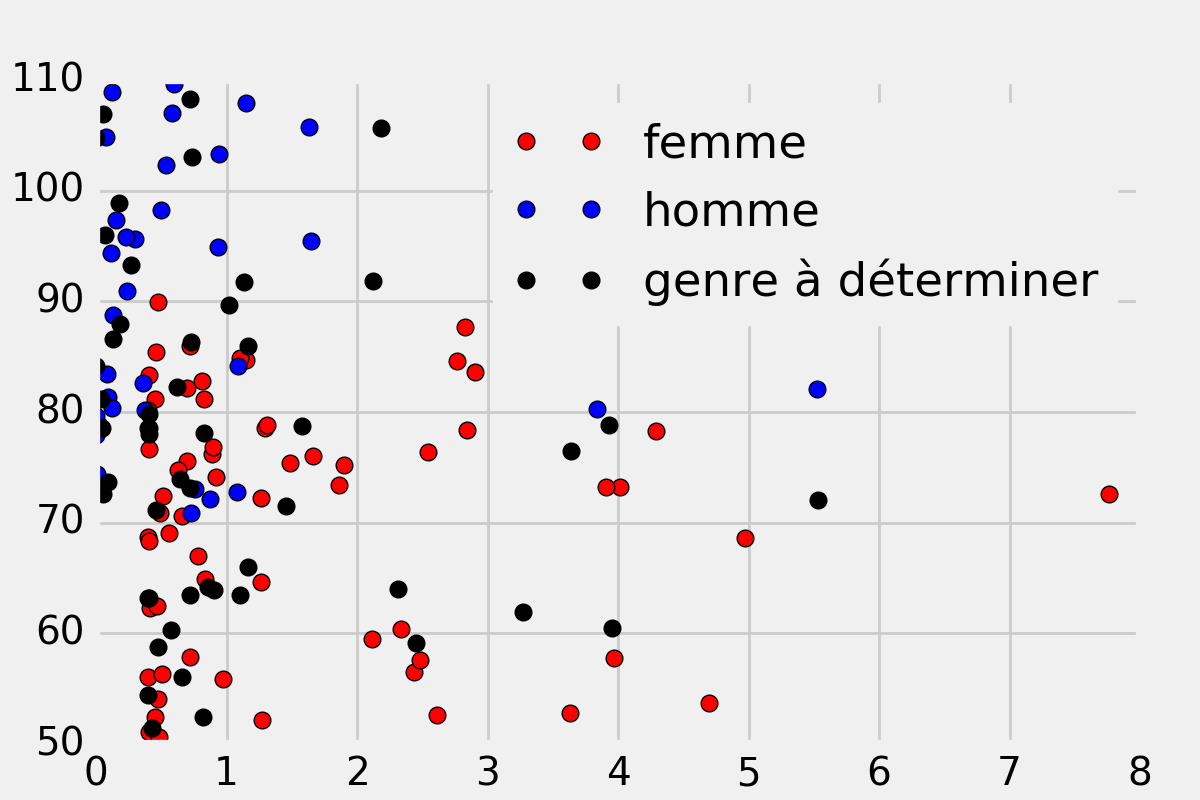

In [7]:
from IPython.display import Image
Image('pos_neg.png')

#### import de la première base de données

In [21]:
from numpy import genfromtxt
my_data = genfromtxt('gender_classification.csv', delimiter=',')

#### normaliser les données

In [34]:
X = my_data[:, 1:]  
X[:,1] /= np.std(X[:,1])
X[:,0] /= np.std(X[:,0])
y = my_data[:, 0]  